## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
from sklearn.cluster import KMeans

## Loading Data

In [3]:
data=pd.read_csv('Countries clusters.csv')

In [4]:
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


## Plotting Graph

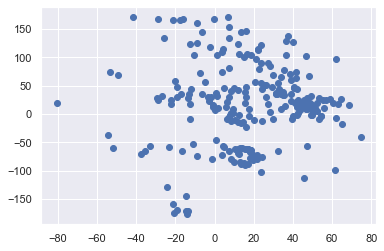

In [5]:
plt.scatter(data.Latitude,data.Longitude)
plt.show()

#### Here we need to take only the latitude and longitude values, So we use iloc function (row indices,column indices)

In [6]:
x=data.iloc[:,1:3]

In [7]:
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

In [8]:
kmeans=KMeans(8) # We need to mention the number of clusters required in bracket

In [9]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
clusters=kmeans.fit_predict(x) # To obtain the number of clusters 

In [11]:
clusters

array([2, 6, 0, 2, 5, 5, 5, 6, 2, 6, 4, 0, 3, 0, 2, 3, 5, 6, 0, 5, 1, 1,
       7, 5, 6, 2, 2, 5, 2, 5, 2, 2, 2, 2, 2, 7, 7, 0, 1, 5, 2, 7, 1, 1,
       0, 1, 4, 2, 0, 1, 2, 2, 2, 2, 6, 6, 5, 5, 6, 2, 5, 2, 1, 2, 6, 6,
       5, 5, 6, 5, 3, 2, 5, 5, 3, 1, 5, 6, 5, 1, 1, 1, 1, 1, 5, 2, 5, 2,
       3, 2, 7, 0, 2, 5, 2, 5, 7, 5, 7, 7, 0, 5, 6, 6, 5, 6, 5, 2, 5, 6,
       7, 6, 6, 0, 6, 7, 2, 2, 7, 5, 6, 7, 6, 1, 5, 2, 5, 7, 0, 5, 5, 5,
       7, 2, 1, 5, 5, 0, 6, 2, 3, 5, 1, 5, 7, 5, 7, 3, 0, 1, 2, 0, 0, 7,
       0, 3, 1, 3, 1, 2, 4, 5, 5, 7, 3, 3, 6, 6, 2, 4, 2, 7, 3, 3, 5, 2,
       7, 5, 2, 6, 4, 6, 5, 7, 0, 1, 6, 6, 0, 1, 7, 1, 1, 3, 1, 2, 5, 6,
       6, 2, 5, 1, 2, 5, 5, 5, 0, 2, 0, 6, 2, 1, 1, 7, 6, 6, 3, 4, 2, 5,
       6, 7, 0, 0, 5, 2, 2, 6, 5, 2, 2, 2, 2, 7, 3, 4, 4, 6, 0, 0, 0])

#### We have 8 clusters, lets add this clusters as new column and map the scatter plot

In [12]:
data_cluster=data.copy()
data_cluster['cluster']=clusters

In [13]:
data_cluster

,name,Longitude,Latitude,cluster
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,6
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,5
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,4
237,Yemen,47.586762,15.909280,6
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


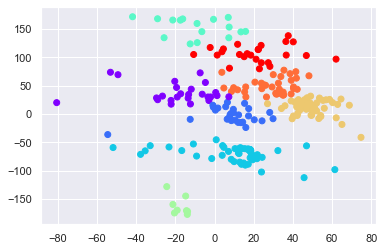

In [14]:
plt.scatter(data_cluster.Latitude,data_cluster.Longitude, c=data_cluster.cluster,cmap='rainbow')
plt.show()

#### Asper this plot, we have 8 clusters with different colours 

### WCSS : Within Cluster Sum of Squares

It is used to find the distance between observations within the cluster by calculating the sum of squares.

In [15]:
kmeans.inertia_

102932.14383201557

In [16]:
WCSS=[]

for i in range (1,9):
    kmeans=KMeans(i)
    kmeans.fit(x)
    WC=kmeans.inertia_
    WCSS.append(WC)

In [17]:
WCSS

[1413859.6798344273,
 657012.0797586325,
 325235.52237055893,
 256573.08675934302,
 192212.4818949704,
 151536.30336760037,
 126973.14389753889,
 102913.61962302422]

### Elbow Graph

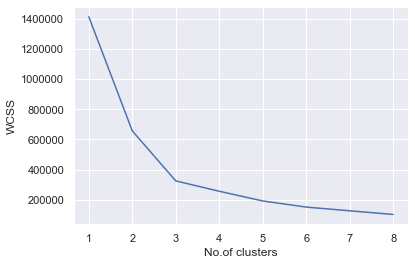

In [18]:
No_clusters=range(1,9)
plt.plot(No_clusters,WCSS)
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()